In [11]:
from os import path
import numpy as np
import networkx as nx
import pygsp as pg
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
import torch
import seaborn as sns
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import radius_neighbors_graph
from sklearn.preprocessing import normalize

In [12]:
def l2(a,b):
    return torch.sqrt((a[0] - b[0])**2  + (a[1] - b[1])**2)

def l1(a,b):
    return torch.abs(a[0] - b[0]) + torch.abs(a[1] - b[1])
def generate_points(n):
    V = torch.rand([n,2])
    return V
def get_l1_dist(V):
    dist =  torch.tensor([ [l1(x,y)  for x in V] for y in V ])
    return dist
def get_l2_dist(V):
    dist =  torch.tensor([ [l2(x,y)  for x in V] for y in V ])
    return dist

In [13]:
N = 100
for idx in range(N):
    n = 100
    p = 0.04
    points = generate_points(n)
    dist = get_l2_dist(points)*2
    #G = nx.gnp_random_graph(n, p)
    G = nx.from_scipy_sparse_array(kneighbors_graph(points, 5))
    #G = nx.from_scipy_sparse_array(kneighbors_graph(points, 0.07))
    adj = nx.adjacency_matrix(G)
    #adj = dist*torch.tensor(adj.todense()).numpy()
    break

In [14]:
G = graphs.Graph(adj)
G.coords = points.numpy()
G.compute_fourier_basis()

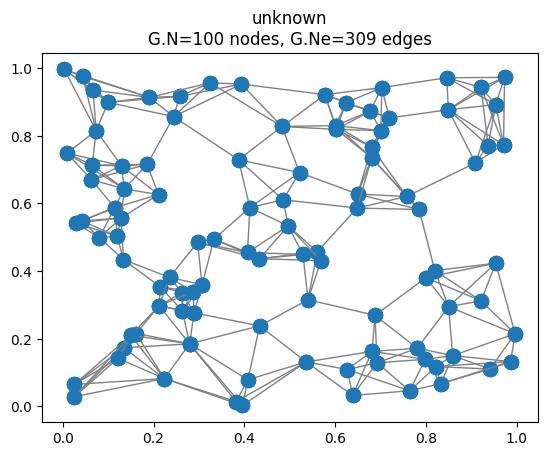

In [15]:
G.plot()

Text(0.5, 1.0, 'Input Node Features X, time=0')

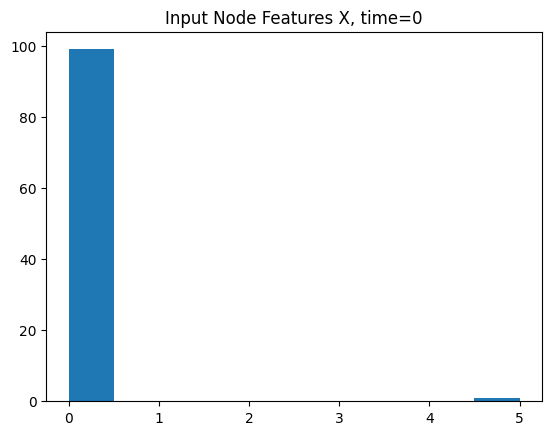

In [16]:
#input X
s = np.zeros(G.N)
s[50] = 5
s = s.reshape(-1, 1)
plt.hist(s.flatten())
plt.title("Input Node Features X, time=0")

In [36]:
graph = nx.Graph(adj)
L = nx.laplacian_matrix(graph).todense()
L = L / np.trace(L) * N

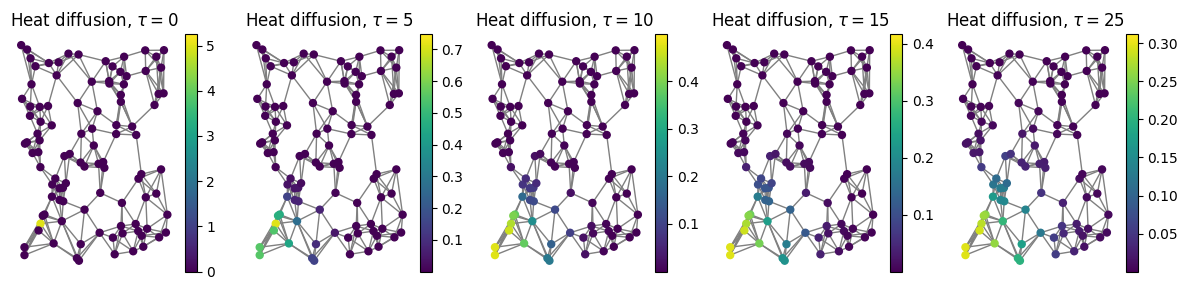

In [37]:
taus = [0, 5, 10, 15, 25]
g = filters.Heat(G, taus)
s = np.zeros(G.N)
s[50] = 5
s = g.filter(s, method='chebyshev')
fig = plt.figure(figsize=(12, 3))
for i in range(g.Nf):
    ax = fig.add_subplot(1, g.Nf, i+1)
    G.plot_signal(s[:, i], vertex_size=25, colorbar=True, ax=ax)
    title = r'Heat diffusion, $\tau={}$'.format(taus[i])
    _ = ax.set_title(title)
    ax.set_axis_off()
fig.tight_layout()

In [52]:
y_1 = s[:, 4] + 0.1*np.random.randn(s[:, i].shape[0])
(y_1.T @ L @ y_1) / np.linalg.norm(y_1)

0.6392363994809405

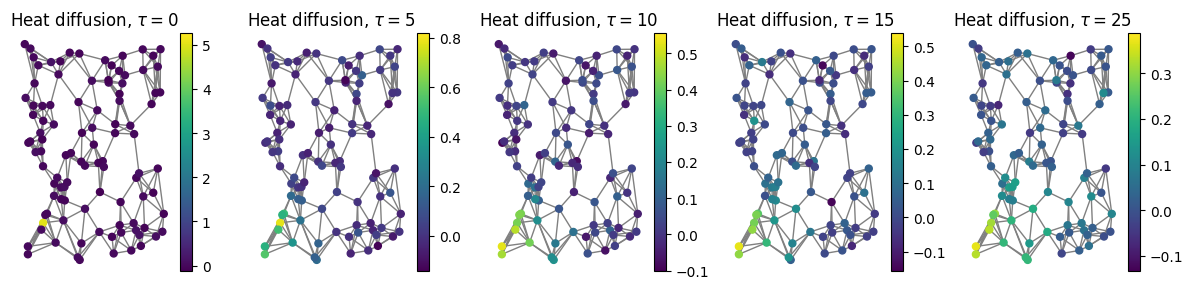

In [48]:
taus = [0, 5, 10, 15, 25]
g = filters.Heat(G, taus)
#s = np.zeros(G.N)
#s[50] = 5
#s = g.filter(s, method='chebyshev')
fig = plt.figure(figsize=(12, 3))
for i in range(g.Nf):
    ax = fig.add_subplot(1, g.Nf, i+1)
    G.plot_signal(s[:, i] + 0.05*np.random.randn(s[:, i].shape[0]), vertex_size=25, colorbar=True, ax=ax)
    title = r'Heat diffusion, $\tau={}$'.format(taus[i])
    _ = ax.set_title(title)
    ax.set_axis_off()
fig.tight_layout()

In [346]:
# Y as result of heat diffusion
s_plot = s[:, 4].reshape(-1, 1)

Text(0.5, 1.0, 'Target Y=F(X, E), time=50')

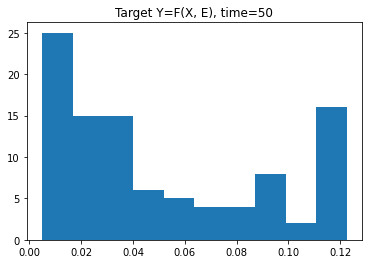

In [347]:
plt.hist(s_plot.flatten())
plt.title("Target Y=F(X, E), time=50")

Text(0.5, 1.0, 'Target Y=F(X, E), time=50')

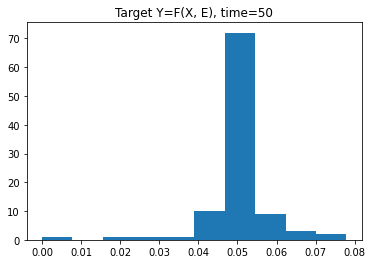

In [156]:
plt.hist(s.flatten())
plt.title("Target Y=F(X, E), time=50")